In [1]:
#log function
# exponent 5^2 = 25
#       5^3=125
# reverse 
#      125 
#     started with 5 base
#     give 5x return , how many years is taken to make 5 to 125?
#     i.e 
#     log 125 of base 5 = 3 years
# so log is inverse of exponential

# log 10 of base 10 = 1


In [2]:
import pandas as pd
import numpy as np
import xlrd
import seaborn as sns

In [3]:
# log use : comparison of revenue 
revenue = {"company":["Tesla","uber","amazon","jindal","axis bank","Vedanta"],
          "revenue":[31.0,11.0,360.0,4.7,5.6,11.3]}

In [4]:
df = pd.DataFrame(revenue)

In [5]:
df

,company,revenue
0,Tesla,31.0
1,uber,11.0
2,amazon,360.0
3,jindal,4.7
4,axis bank,5.6
5,Vedanta,11.3


<AxesSubplot:xlabel='company'>

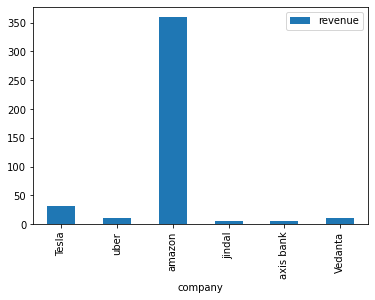

In [6]:
df.plot(x='company',y='revenue',kind='bar')

<AxesSubplot:xlabel='company'>

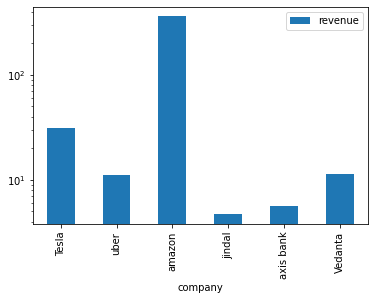

In [7]:
# log axis solve the comparison problem along y axis
df.plot(x='company',y='revenue',kind='bar', logy=True)


In [8]:
# loan approved correction pooja's income it biased the machine learning model
df1 = pd.read_excel('D:/cars/loan_aprv.xlsx')

In [9]:
df1

,person name,credit score,income,age,loan approved?
0,sourav,750,80000,26,y
1,bappa da,310,32000,32,n
2,pk,475,77000,27,y
3,jmohan,600,65000,34,n
4,pooja,820,550000,35,y


In [10]:
df2 = pd.read_excel('D:/cars/loan_aprv.xlsx', sheet_name='Sheet2')

In [11]:
df2

,person name,credit score,income,age,loan approved?,log income
0,sourav,750,80000,26,y,4.903090
1,bappa da,310,32000,32,n,4.505150
2,pk,475,77000,27,y,4.886491
3,jmohan,600,65000,34,n,4.812913
4,pooja,820,550000,35,y,5.740363


In [12]:
df3 = pd.read_excel('D:/cars/loan_aprv.xlsx', sheet_name='Sheet3')

In [13]:
df3

,name,income
0,sourav,44563
1,pk,45778
2,bappa,56578
3,soyel,98774
4,souvcik,10022000000


In [14]:
df3.T

,0,1,2,3,4
name,sourav,pk,bappa,soyel,souvcik
income,44563,45778,56578,98774,10022000000


In [15]:
df3 = df3.sort_values(by=['income'])

In [16]:
df3

,name,income
0,sourav,44563
1,pk,45778
2,bappa,56578
3,soyel,98774
4,souvcik,10022000000


In [17]:
#median  : the middle value of series in df3 median is 56578 in income column for if no of values is even the median value will be the average of the tdwo middle value
#median use :
#   if one income value is missing then we use there median value instead of average value because here average value will be bias due to souvik's huge income and average value will be very high
#  and cannot predicts loan approved
#median is use in 1.Descriotive:people income for car purchasing 2.DataCleaning(Filling NA Values):loan approved case

In [18]:
#Outlair: datapoint which is very different from rest of the datapoint
# then we have to remove this outlair

In [19]:
# 50 percentile: datapoint below median are belonged to 50 % and also datapoint heigher than median are also belongs to 50%
# ie. 50 percentile limit is median  and 100 percentile limit is last heighest value : in df3 souvik's income is 100 percentile
# 25th percentile: data points are blongs to half of 50 percentile: pk's income is 25th percentile
# 75th percentile: data points are belongs to half of median to 100th percentile ie in df3 soyel's income is 75th percentile

In [20]:
# IQR: range between 25th and 75th percentile is callled interquartile range
# use to remove outlair
#99 percentile: previous data point of 100th percentile 
#use the 100th percentile that is outlair by using percentile
#percentile use in 1.outlair removal : income dataset and 2.General Data Analysis:sat/gre score
#percentile is the relative : if you get highest marks that is you get 100 percentile i.e maximum in the marks range

In [21]:
#MODE: which is maximum same choice : most frequently occuring value in a dataset

In [22]:
df4 = pd.read_excel('D:/cars/loan_aprv.xlsx', sheet_name='Sheet4')

In [23]:
df4

,Name,Resturant choice
0,sourav,mexican
1,pk,italian
2,bappa,mexican
3,soyel,mexican
4,subha,indian
5,apurba,italian


In [24]:
#in df4 mode is mexican which is more frequent 

In [25]:
df3

,name,income
0,sourav,44563
1,pk,45778
2,bappa,56578
3,soyel,98774
4,souvcik,10022000000


In [26]:
df3.describe()

,income
count,5.000000e+00
mean,2.004449e+09
std,4.481947e+09
min,4.456300e+04
25%,4.577800e+04
50%,5.657800e+04
75%,9.877400e+04
max,1.002200e+10


In [27]:
df3.income.quantile(0.75)

98774.0

In [28]:
#just next value of 25 percentile
df3.income.quantile(0.25, interpolation="higher")

45778

In [29]:
#just previous value of 25 percentile
df3.income.quantile(0.25, interpolation="lower")

45778

In [30]:
#100%
df3.income.quantile(1)

10022000000.0

In [31]:
# to discard outlair more than 99 percentile
df3.income.quantile(0.99)

9621123950.96

In [32]:
percentile_99 = df3.income.quantile(0.99)

In [33]:
df3[df3.income>percentile_99]

,name,income
4,souvcik,10022000000


In [34]:
df_no_outlair = df3[df3.income<=percentile_99]

In [35]:
df_no_outlair

,name,income
0,sourav,44563
1,pk,45778
2,bappa,56578
3,soyel,98774


In [36]:
df3

,name,income
0,sourav,44563
1,pk,45778
2,bappa,56578
3,soyel,98774
4,souvcik,10022000000


In [37]:
df3['income'][2]=np.NaN

C:\Users\lenovo\AppData\Local\Temp/ipykernel_17024/3316303110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['income'][2]=np.NaN
C:\Users\lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [38]:
df3

,name,income
0,sourav,4.456300e+04
1,pk,4.577800e+04
2,bappa,NaN
3,soyel,9.877400e+04
4,souvcik,1.002200e+10


In [39]:
df3.income.mean()

2505547278.75

In [40]:
df_new = df3.fillna(df3.income.mean())

In [41]:
df_new

,name,income
0,sourav,4.456300e+04
1,pk,4.577800e+04
2,bappa,2.505547e+09
3,soyel,9.877400e+04
4,souvcik,1.002200e+10


In [42]:
# bappa's income will be very high because of outlair
# so we use median instead of mean to fill Nan

In [43]:
df_new = df3.fillna(df3.income.median())

In [44]:
df_new

,name,income
0,sourav,4.456300e+04
1,pk,4.577800e+04
2,bappa,7.227600e+04
3,soyel,9.877400e+04
4,souvcik,1.002200e+10


In [45]:
# statistics: two types 1.descriptive and 2.inferential
#inferential statistics: vaccine test on 40k people group among entire population
#so 40k people is called sample give 95% eficasy so it is infered that eficasy for entire population is around 95%

In [46]:
#descriptive statistics: when test conduct among whole popualation, entire dataset, all sample like exam result analysis of a class

In [47]:
df5 = pd.read_excel('D:/cars/loan_aprv.xlsx', sheet_name='Sheet5')

In [48]:
df5

,Subject,Score,abs(score-average),Unnamed: 3,Unnamed: 4,Unnamed: 5
0,virat,56,13,NaN,NaN,NaN
1,mohan,45,24,NaN,NaN,NaN
2,sofia,89,20,NaN,NaN,69.0
3,lool,56,13,NaN,NaN,NaN
4,abdul,90,21,NaN,NaN,NaN
5,bappa,78,9,NaN,NaN,NaN


In [49]:
df5.mean()

C:\Users\lenovo\AppData\Local\Temp/ipykernel_17024/1640132065.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df5.mean()


Score                 69.000000
abs(score-average)    16.666667
Unnamed: 3                  NaN
Unnamed: 4                  NaN
Unnamed: 5            69.000000
dtype: float64

In [50]:
# the individuals data point are how far apart from the average , how individual datapoints are spreads out respect to average 
#

In [51]:
df5 = pd.read_excel('D:/cars/loan_aprv.xlsx', sheet_name='Sheet5')

In [52]:
df5

,Subject,Score,abs(score-average),Unnamed: 3,Unnamed: 4,Unnamed: 5
0,virat,56,13,NaN,NaN,NaN
1,mohan,45,24,NaN,NaN,NaN
2,sofia,89,20,NaN,NaN,69.0
3,lool,56,13,NaN,NaN,NaN
4,abdul,90,21,NaN,NaN,NaN
5,bappa,78,9,NaN,NaN,NaN


In [53]:
# df5.drop(['Unnamed:3','Unnamed:4','Unnamed:5'])

In [54]:
df5.rename(columns={'abs(score-average)':'diffavr'},inplace=True)

In [55]:
df5

,Subject,Score,diffavr,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,virat,56,13,NaN,NaN,NaN
1,mohan,45,24,NaN,NaN,NaN
2,sofia,89,20,NaN,NaN,69.0
3,lool,56,13,NaN,NaN,NaN
4,abdul,90,21,NaN,NaN,NaN
5,bappa,78,9,NaN,NaN,NaN


In [56]:
df5.diffavr.mean()

16.666666666666668

In [57]:
# this previous cell average value 16.66666 is called MEAN ABSOLUTE DEVIATION= mad  ???? it represent spread out charecteristics of datapoints from average point ;
# more MAD more spread less MAD less spread   

In [58]:
sub={'virat':56,'mohan':45,'sofia':56,'lool':56}
score = pd.Series(sub)

In [59]:
score

virat    56
mohan    45
sofia    56
lool     56
dtype: int64

In [60]:
sub1={
    "name":['virat','mohan','sofia','lool'],
    "score":[56,45,56,56]
}

In [61]:
df6=pd.DataFrame(sub1)

In [62]:
df6

,name,score
0,virat,56
1,mohan,45
2,sofia,56
3,lool,56


In [63]:
#for same value of MAD df5 and df6 datapoints distribution or spreading will be different so MAD is not usefull
# then if we do squreroot of(average of(squre of( differences of individual points and its average))) then it will be well distributed
#then this value is called Standard Deviation; and different value of standard deviation(s.d) datapoint spead out distribution will be different
# less s.d more datapoints spead out and more s.d less datapoints spreadout.

In [64]:
# Normal Distribution:
#Bell Curve: like test score out of 100

#right skewed curve: income curve 
# if we apply log function along x axis then right skewed curve will become normal distribution 
# log normally distributed : if you get a normal distribution by applying a log function to a dataset then dataset

# we can use log function in df3 income chart 

In [65]:
df6 = df5 = pd.read_excel('D:/cars/loan_aprv.xlsx', sheet_name='Sheet6')

In [66]:
df6

,Income,Count
0,5000,4371
1,10000,3295
2,15000,5825
3,20000,6074
4,25000,6097
5,30000,5634
6,35000,6798


In [67]:
# df = pd.read_csv(
#      "income.csv",
#      index_col=None,
#      names=["income","count"],
#      skiprows=1)

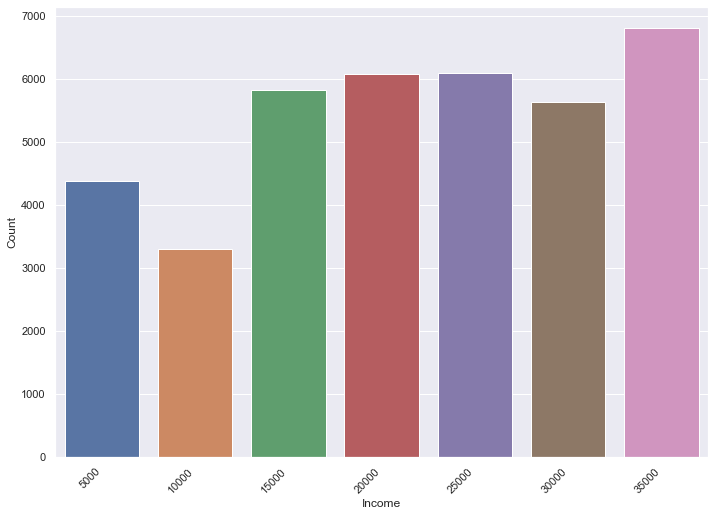

In [68]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.barplot(x='Income',y='Count',data=df6)
g.set_xticklabels(g.get_xticklabels(),
                 rotation=45,
                 horizontalalignment='right');

In [69]:
# this is not a normal distribution
# to make this normal we use log function

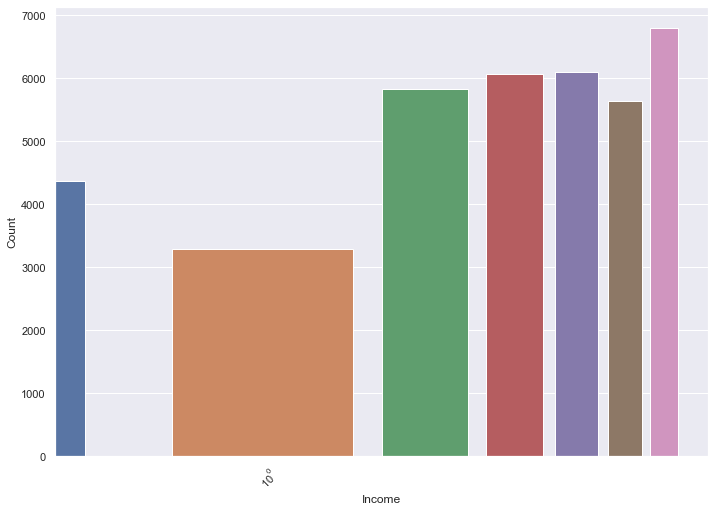

In [70]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
g = sns.barplot(x='Income',y='Count',data=df6)
g.set_xticklabels(g.get_xticklabels(),
                 rotation=45,
                 horizontalalignment='right');
g.set(xscale='log');

In [71]:
# auto annotate
#vector mathematics
#to represent similarity
#document similarity is 17 degree: 0-90
#Cosine17=0.95
#document similarity is 0.9: 0-1
#Cosine Similarity
#A and B are two vectors
#A .B = ABCOS
#cos(theta) = A.B/(||A|| ||B||)=Cosine Similarity
# #=||A|| ||B||* Cos(theta)/||A|| ||B||
# if theta=0; cos similarity=cos(theta)=1; represent simialr; cos distance = 0;
#         = 90;                        =0; represent no similarity;        =1;
#         =180;                        =-1; represent opposite concept     =?
#Cosine Distance = 1-Cosine Similarity

In [72]:
# suppose in one documet "abc" word is mention 3 times and 'xyz' word is mention 1 times and in another document 'abc' word is mention 6 times and 'xyz' word is mentioned 2 times then these two documents are represent as A vector and B vector to find cosine similarity
# in cartedian coordinate two vector point are (3,1) and (6,2) represent as A and B vector
#to find the similarity

In [73]:
from sklearn.metrics.pairwise import cosine_similarity, cosine_distances

In [74]:
cosine_similarity([[3,1]],[[6,2]])

array([[1.]])

In [75]:
#similarity is 1 means two vectors are in same direction and and angle between them is 0; cos0=1;
#which means two documents are very similar

In [76]:
cosine_distances([[3,1]],[[6,2]])

array([[1.11022302e-16]])

In [77]:
#that is close to zero

In [78]:
cosine_similarity([[3,1]],[[3,2]])

array([[0.96476382]])

In [79]:
#in that case similarity is near 1 but not actual similar

In [80]:
#in 4 documents :

In [81]:
df7 = pd.DataFrame([
     {'iphone':3, 'galaxy':1},
     {'iphone':2, 'galaxy':0},
     {'iphone':1, 'galaxy':3},
     {'iphone':1, 'galaxy':2},
  ],
    index=[
        "doc1",
        "doc2",
        "doc3",
        "doc4"
    ]
)

In [82]:
df7

,iphone,galaxy
doc1,3,1
doc2,2,0
doc3,1,3
doc4,1,2


In [83]:
df7.loc["doc1":"doc1"]

,iphone,galaxy
doc1,3,1


In [84]:
df7.loc["doc1"]

iphone    3
galaxy    1
Name: doc1, dtype: int64

In [85]:
df7.loc["doc1":"doc2"]

,iphone,galaxy
doc1,3,1
doc2,2,0


In [86]:
cosine_similarity(df7.loc["doc1":"doc1"], df7.loc["doc2":"doc2"])

array([[0.9486833]])

In [87]:
#0.94 so they doc1 and doc2 are very similar

In [88]:
cosine_similarity(df7.loc["doc1":"doc1"], df7.loc["doc3":"doc3"])

array([[0.6]])

In [89]:
#doc1 and doc3 are less similar

In [90]:
# A B testing: suppose you make a website of two version one is A and another is B . in A subscribe button in right up corner and in B subscribe button in middle position 
# then test this two version of website among same no of sample and find the no of click rate or subscribe rate

In [91]:
# hypothesis testing: suppose a drug company made a drug for a  particular disease like headech  that is A .then a new company make a drug for same disease that is B suppose drug A take 4 hours and drug B take 3 hours to get cure among 10 volunteers so based on this we can not tell this that B is better as sample is very tiny.
# when sample size is increased then also we can not say that because it depends on two factor 1. sample size 2. factor/variation in sample
#Alternating hypothesis 
#null hypothesis: suppose drug A is better than B . if we can prove that the statement is wrong  then automatically it will be pove that drug B is better than A.
# T-test
# Z-Test
# Anova
# Chi-Squre test
# to eleminent the factor of randomness

In [92]:
# Z-Score

In [93]:
df8 = df5 = pd.read_excel('D:/cars/loan_aprv.xlsx', sheet_name='Sheet8')

In [94]:
df8

,name,height
0,Rob,4.5
1,laxmi,4.9
2,ken,5.2
3,abdul,5.5
4,maria,6.2
5,esha,7.0
6,david,10.0


<AxesSubplot:xlabel='name'>

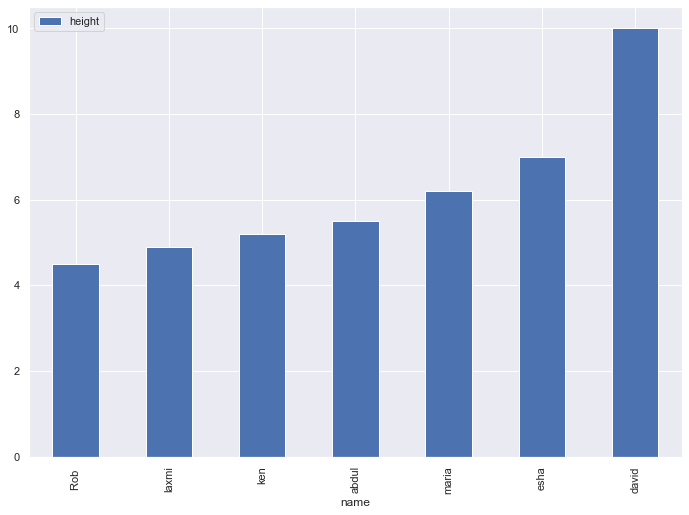

In [95]:
df8.plot(x='name', y='height', kind='bar')

<AxesSubplot:xlabel='name', ylabel='height'>

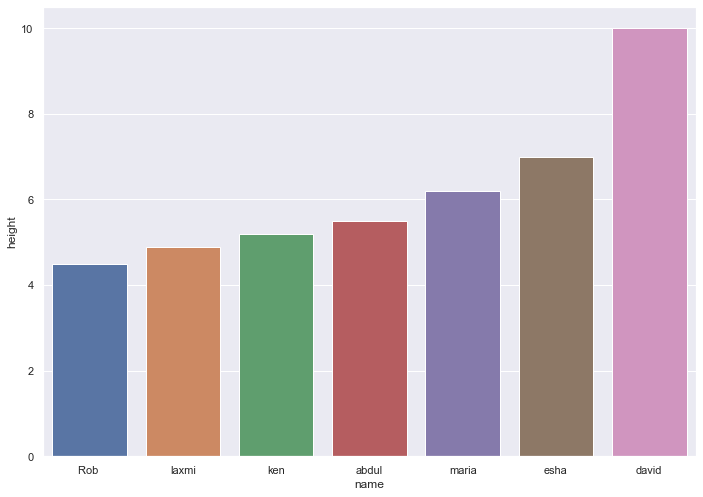

In [96]:
sns.barplot(x='name',y='height',data=df8)

In [97]:
df8.describe()

,height
count,7.000000
mean,6.185714
std,1.877435
min,4.500000
25%,5.050000
50%,5.500000
75%,6.600000
max,10.000000


In [98]:
df8.mean()

C:\Users\lenovo\AppData\Local\Temp/ipykernel_17024/1020839258.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df8.mean()


height    6.185714
dtype: float64

In [99]:
df8.median()

C:\Users\lenovo\AppData\Local\Temp/ipykernel_17024/2233681866.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df8.median()


height    5.5
dtype: float64

In [100]:
#mean always affected by outlair it shifted towards outlairs or high value 
# but median is middle number is not impacted by outlair or high  value
# so people use median instead of mean as a basis point 

# MEDIAN ABSOLUTE DEVIATION  or MAD:

#MAD=median(|x-median(x)|)


In [101]:
# modified Z-Score= o.6745*(x-median(x))/MAD

In [102]:
# z-score=(x-average_hight)/std  using mean or average;

In [103]:
df9 = df5 = pd.read_excel('D:/cars/loan_aprv.xlsx', sheet_name='Sheet7')

In [104]:
df9

,name,height,z-score,height-median,z-score>3,modified_Z-score,m-z-score>3.5
0,Rob,4.5,-0.969823,1.0,False,-1.428571,False
1,laxmi,4.9,-0.739695,0.6,False,-0.857143,False
2,ken,5.2,-0.567100,0.3,False,-0.428571,False
3,abdul,5.5,-0.394504,0.0,False,0.000000,False
4,maria,6.2,0.008219,0.7,False,1.000000,False
5,esha,7.0,0.468474,1.5,False,2.142857,False
6,david,10.0,2.194430,4.5,False,6.428571,True


In [105]:
#here 10 is a outlair no person generaly having height 10 feet but it cant be find out in z-score

In [106]:
#so modified z-score: threshold value is 3.5 so here modified z-score 6.42 is an outlair

In [107]:
df9=pd.read_csv('C:/Users/lenovo/Downloads/movies.csv')

In [108]:
df9.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [109]:
df9.revenue.describe()

count    4.803000e+03
mean     8.226064e+07
std      1.628571e+08
min      0.000000e+00
25%      0.000000e+00
50%      1.917000e+07
75%      9.291719e+07
max      2.787965e+09
Name: revenue, dtype: float64

In [110]:
df9['revenue_mln'] = df9['revenue'].apply(lambda x: x/1000000)

In [111]:
# df9['revenue_mln'] = df9['revenue'].apply(for x in revenue: print( x=x/1000000))

In [112]:
df9.revenue_mln.describe()

count    4803.000000
mean       82.260639
std       162.857101
min         0.000000
25%         0.000000
50%        19.170001
75%        92.917187
max      2787.965087
Name: revenue_mln, dtype: float64

In [113]:
_, mean, std, *_=df9.revenue_mln.describe()

In [114]:
mean, std

(82.26063865167637, 162.85710094282624)

In [115]:
def get_z_score(value, mean, std):
    return (value-mean)/std

In [116]:
df9['z_score'] = df9.revenue_mln.apply(lambda x: get_z_score(x, mean, std))

In [117]:
df9.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,revenue_mln,z_score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2787.965087,16.613979
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,961.000000,5.395769
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,880.674609,4.902543


In [130]:
df9[df9.z_score>3].head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,revenue_mln,z_score,mod_z_score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2787.965087,16.613979,97.420563
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,961.000000,5.395769,33.138461
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,880.674609,4.902543,30.312198
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,1084.939099,6.156799,37.499281
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576,890.871626,4.965156,30.670982


In [119]:
def get_mad(s):
    median = np.median(s)
    diff = abs(s-median)
    MAD = np.median(diff)
    return MAD

In [120]:
MAD = get_mad(df9.revenue_mln)
median = np.median(df9.revenue_mln)
MAD, median

(19.170001, 19.170001)

In [124]:
def get_modified_z_score(x, median,MAD):
    return 0.6745*((x-median)/MAD)

In [126]:
get_modified_z_score(2787,median,MAD)

97.38660599576912

In [127]:
df9['mod_z_score'] = df9.revenue_mln.apply(lambda x: get_modified_z_score(x, median, MAD))

In [129]:
df9.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,revenue_mln,z_score,mod_z_score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2787.965087,16.613979,97.420563
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,961.000000,5.395769,33.138461
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,880.674609,4.902543,30.312198
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,1084.939099,6.156799,37.499281
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,284.139100,1.239605,9.322986


In [132]:
df9[df9.mod_z_score>3.5].head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,revenue_mln,z_score,mod_z_score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2787.965087,16.613979,97.420563
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,961.000000,5.395769,33.138461
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,880.674609,4.902543,30.312198
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,1084.939099,6.156799,37.499281
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,284.139100,1.239605,9.322986
